## 异常值 Outlier

本节代码包括：
- 从 csv 获取数据
- 查看数据集
- 查看数据基本描述信息
- 查看变量的类型
- 查看数据集形状
- 数值型变量（unique取值/直方图）
- 类别型变量（unique取值/直方图）

本节使用的数据集是titanic幸存者预测的数据。下载地址 [Kaggle website](https://www.kaggle.com/c/titanic/data)。 注意请下载 train.csv，并更名为 titanic.csv 放置在 /data 目录下。

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# to display the total number columns present in the dataset
pd.set_option('display.max_columns', None)

import seaborn as sns

### 异常值检测 Outlier Detection


In [2]:
# 读取数据
data = pd.read_csv('../data/titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


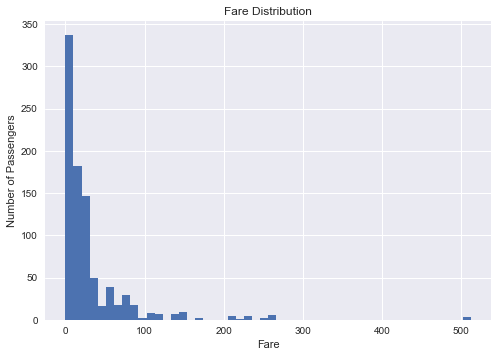

In [4]:
# 用直方图观察变量 Fare 的分布
fig = data.Fare.hist(bins=50)
fig.set_title('Fare Distribution')
fig.set_xlabel('Fare')
fig.set_ylabel('Number of Passengers')

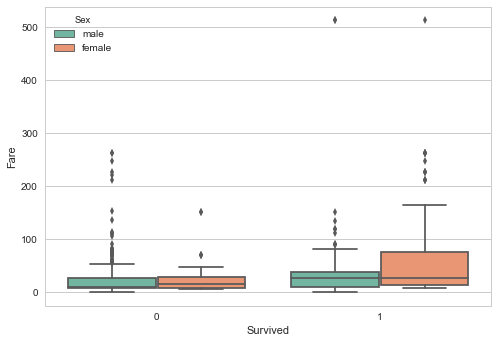

In [18]:
# 或者用 boxplot 来观察
# 这里我们稍微搞复杂点，用 Survived作为横轴，Sex 作为分组变量，
# 观察 Fare的分布
sns.set_style("whitegrid")
sns.boxplot(x='Survived',y='Fare',hue='Sex',data=data,palette="Set2")
# fig = data.boxplot(column='Fare')
# fig.set_title('')
# fig.set_xlabel('Survived')
# fig.set_ylabel('Fare')


看到Fare 变量是高度偏态的变量，因此用箱线图方法来检测异常值

#### 箱线图法

In [19]:
# 观察Fare 变量的几个百分位数
data.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [24]:
# 计算 IQR，上下界
'''
IQR = 75th分位数 - 25th分位数

上界 = 75th分位数 + （IQR * 3）

下界 = 25th分位数 - （IQR * 3）
'''
IQR = data.Fare.quantile(0.75) - data.Fare.quantile(0.25)

Lower_fence = data.Fare.quantile(0.25) - (IQR * 3)
Upper_fence = data.Fare.quantile(0.75) + (IQR * 3)

Upper_fence, Lower_fence, IQR

(100.2688, -61.358399999999996, 23.0896)

In [25]:
# 看看满足条件的人数 和占比
total_passengers = np.float(data.shape[0]) # 总人数
print('total passengers: {}'.format(data.shape[0]))

print('passengers that paid more than 100: {}'.format(
    data[data.Fare > 100.2688].shape[0]))

print('passengers that paid more than 100 ratio: {}'.format(
    data[data.Fare > 100.2688].shape[0]/ total_passengers))


total passengers: 891
passengers that paid more than 100: 53
passengers that paid more than 100 ratio: 0.05948372615039282


可以看到使用 75th分位数 + （IQR * 3）作为上界限时，有 5.9%的人被视为异常值。
我们进一步看一下这些异常的记录。

In [26]:
#  筛选出这部分记录
high_fare_df = data[data.Fare>100]

# 分组统计
high_fare_df.groupby('Ticket')['Fare'].count()

Ticket
113503      1
113760      4
113781      4
16966       2
17421       4
19950       4
24160       3
35273       3
36928       2
PC 17483    1
PC 17558    2
PC 17569    2
PC 17582    3
PC 17608    2
PC 17611    2
PC 17755    3
PC 17757    4
PC 17758    2
PC 17760    3
PC 17761    2
Name: Fare, dtype: int64

发现原因了，几个人一起买的团票会用同一个ticket number，怪不得Fare单价高了。